### Data Preprocessing and Feature Engineering:

#### 1. Dropping Unnecessary Columns:
Three columns named 'Treatment condition', 'Chemical used', and 'Hypothesis for cause of cell death' were deemed redundant and thus removed from the dataset.

#### 2. Treatment Categorization:
Based on the combination of concentrations of 'Ferric citrate' and 'Aß 1-42', the samples were categorized into four different treatment groups:
- Both concentrations are 0: treatment = 0
- Only 'Ferric citrate' is non-zero: treatment = 1
- Only 'Aß 1-42' is non-zero: treatment = 2
- Both concentrations are non-zero: treatment = 3

The categorization was done using a set of conditions and the resulting categories were stored in the 'treatment' column.

#### 3. Handling Missing Data:
For columns '%ldh', 'cells dead', and 'cells alive', missing values were imputed using the mean of their respective treatment group.

#### 4. Feature Calculation:
A new column 'Total Cells' was created by summing up 'cells alive' and 'cells dead' for each row. Percentage columns '% cells alive', '% cells dead', and '%Neuron alive' were computed as ratios of respective cell counts to the 'Total Cells'.


In [4]:
import pandas as pd
import numpy as np

file_path = 'Book1.xlsx - Sheet2.csv'
file_path1 = 'data/Book1.xlsx - Sheet2 (1).csv'

data_train = pd.read_csv(file_path, header=1)

data_train = data_train.drop(columns=['Treatment condition', 'Chemical used', 'Hypothesis for cause of cell death'])


# Define the conditions

conditions1 = [
    (data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] == 0),
    (data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] == 0),
    (data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] != 0),
    (data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] != 0)
]

# Define the values to assign for each condition
values = [0, 1, 2, 3]

# Apply conditions and assign values


data_train['treatment'] = np.select(conditions1, values)
data_train['%ldh'] = data_train.groupby('treatment')['%ldh'].transform(lambda x: x.fillna(x.mean()))
data_train['cells dead'] = data_train.groupby('treatment')['cells dead'].transform(lambda x: x.fillna(x.mean()))
data_train['cells alive'] = data_train.groupby('treatment')['cells alive'].transform(lambda x: x.fillna(x.mean()))
data_train['Total Cells'] = data_train['cells alive'] + data_train['cells dead']
data_train['% cells alive'] = (data_train['cells alive'] / data_train['Total Cells']) * 100
data_train['% cells dead'] = (data_train['cells dead'] / data_train['Total Cells']) * 100
data_train['%Neuron alive'] = (data_train['Neurons alive'] / data_train['cells alive']) * 100

data_train

,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,%ldh,Neurons alive,Glial alive,treatment,% cells alive,% cells dead,%Neuron alive
0,0,0,568,645,1213,1,0,0,0,7.16,156,449,0,46.826051,53.173949,27.464789
1,85,0,252,952,1204,0,1,1,0,31.03,41,525,1,20.930233,79.069767,16.269841
2,0,35,594,775,1369,0,0,0,1,22.76,151,456,2,43.389335,56.610665,25.420875
3,85,35,328,1264,1592,0,1,1,1,39.04,48,440,3,20.603015,79.396985,14.634146
4,0,0,848,223,1071,1,0,0,0,7.21,89,563,0,79.178338,20.821662,10.495283
5,85,0,186,1167,1353,0,1,1,0,20.51,67,420,1,13.747228,86.252772,36.021505
6,0,35,594,775,1369,0,0,0,1,30.74,65,774,2,43.389335,56.610665,10.942761
7,85,35,358,1282,1640,0,1,1,1,41.54,31,429,3,21.829268,78.170732,8.659218
8,0,0,322,357,679,1,0,0,0,13.95,98,363,0,47.422680,52.577320,30.434783
9,85,0,104,733,837,0,1,1,0,25.21,84,429,1,12.425329,87.574671,80.769231


## Correlation Matrix Computation:

Computed the correlation matrix of the DataFrame using the `corr()` method. This method evaluates the Pearson correlation coefficients between all pairs of numeric columns in the DataFrame.

### Formula for Pearson correlation coefficient between two variables:

Given two variables \(X\) and \(Y\), the Pearson correlation coefficient \(r\) is calculated as:

$$ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $$

Where:
- $ ( \bar{X} ) $ is the mean of \(X\)
- $ ( \bar{Y} ) $ is the mean of \(Y\)
- \(n\) is the number of data points

In simple terms, the Pearson correlation coefficient measures the linear relationship between two datasets. The resulting value lies between -1 and 1:

- **-1**: Perfect negative linear correlation
- **1**: Perfect positive linear correlation
- **0**: No linear correlation

### Visualization:

Heatmaps were generated for each correlation matrix to visually represent these relationships, with color gradients from blue (indicating negative correlation) to red (indicating positive correlation). A heatmap was generated for each of the treatment conditions and for the entire dataset.

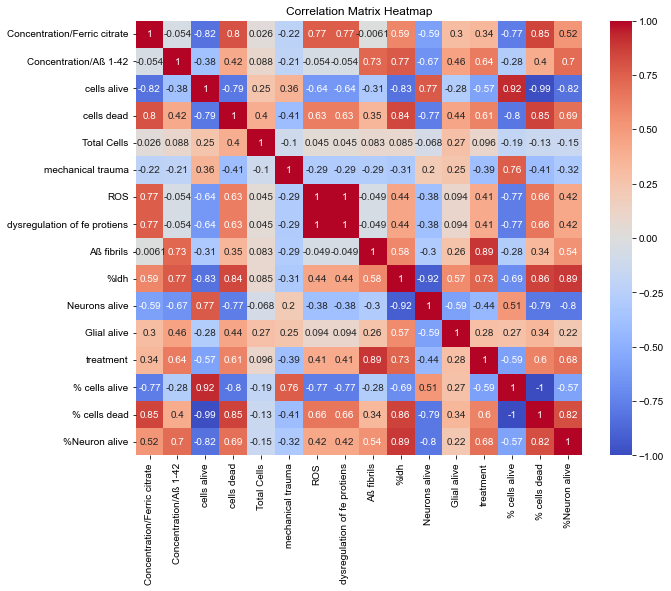

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train_control = data_train[(data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] == 0)]
data_train_Aß = data_train[(data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] != 0)]
data_train_fe = data_train[(data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] == 0)]
data_train_both = data_train[(data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] != 0)]

# Calculate correlation matrix
corr_matrix = data_train.corr(method='pearson')




# Plot the heatmap for correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as per your requirement
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


## Analysis Summary

### Data Preparation:
Began analysis by partitioning our dataset, `data_train`, into subsets based on treatment conditions (`Concentration/Ferric citrate` and `Concentration/Aß 1-42`).

### Model Training:

#### Linear Regression on LDH Levels:
- **Features**: `Concentration/Ferric citrate` and `Concentration/Aß 1-42`
- **Target**: `%ldh`

Trained a Linear Regression model to predict the LDH levels based on the two features.

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p + \epsilon\ $$

- $ (Y) $ represents the dependent variable.
- $(\beta_0) $ is the intercept (y-intercept).
- $ (\beta_1, \beta_2, \ldots, \beta_p) $ are the coefficients of the independent variables $ (X_1, X_2, \ldots, X_p)$.
- $(X_1, X_2, \ldots, X_p)$ are the independent variables.
- $(\epsilon)$ represents the error term.


### Data Augmentation:
For prediction purposes, we constructed combinations of concentrations for Ferric citrate and Aß 1-42:
1. Generated all possible combinations for 'Concentration/Ferric citrate' (from 40 to 119) and 'Concentration/Aß 1-42' (from 15 to 64).
2. Additional combinations were generated with fixed concentrations for either Ferric citrate or Aß 1-42.
3. The idea is to check the behaviour of ferric citrate and Aß in various concentrations.

### Making Predictions:
Used the trained Linear Regression model to predict LDH levels for these new combinations.
Predicted the number of dead cells using the aforementioned features along with additional parameters like `%ldh`, `treatment`, etc.

### Data Post-processing:
1. Created a new dataset from the predicted values and appended this to the original `data_train`.
2. Re-calculated the treatment conditions and updated the `treatment` column based on the concentrations.
3. Updated the `% cells dead`, `cells dead`, and `cells alive` columns based on predictions and original data.

### Final Output:
The final output is the `data_train` dataframe that has been augmented with additional data based on predictions and combinations.

### Formulae:
- **Calculation for % cells dead**:
  $$ \% \text{cells dead} = \frac{\text{cells dead}}{\text{Total Cells}} \times 100 $$

- **Calculation for cells alive**:
  $$ \text{cells alive} = \text{Total Cells} - \text{cells dead} $$


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import itertools
import random
import statsmodels.api as sm

# Prepare data
X = data_train[['Concentration/Ferric citrate', 'Concentration/Aß 1-42']]
y = data_train['%ldh']

# Train Linear model
model = LinearRegression() # default objective for regression
model.fit(X, y)

classifier = LogisticRegression


# All possible combinations for 'Concentration/Ferric citrate' values 0-100 
# and 'Concentration/Aß 1-42' values 0-60
ferric_citrate_values = range(40, 120)  # 0 to 100
aß_values = range(15, 65)  # 0 to 60

all_combinations = list(itertools.product(ferric_citrate_values, aß_values))
samples = len(all_combinations) // 24
all_combinations = random.sample(all_combinations, samples)

# Some more data with 'Concentration/Ferric citrate' values 0-100 
# and 'Concentration/Aß 1-42' as constant 35
#constant_aß_35 = list(itertools.product(ferric_citrate_values, [35]))
#samples_aß_35 = len(constant_aß_35) // 3
#constant_aß_35 = random.sample(constant_aß_35, samples_aß_35)

# Some more data with 'Concentration/Ferric citrate' values 0-100 
constant_aß_0 = list(itertools.product(ferric_citrate_values, [0]))
samples_aß_0 = len(constant_aß_0) // 3
constant_aß_0 = random.sample(constant_aß_0, samples_aß_0)


# 'Concentration/Ferric citrate' as constant 85 
# and 'Concentration/Aß 1-42' as constant values 0-60
#constant_ferric_85 = list(itertools.product([85], aß_values))
#samples_ferric_85 = len(constant_ferric_85)
#constant_ferric_85 = random.sample(constant_ferric_85, samples_ferric_85)


#'Concentration/Aß 1-42' as values 0-60
constant_ferric_0 = list(itertools.product([0], aß_values))
samples_ferric_0 = len(constant_ferric_0)//2
constant_ferric_0 = random.sample(constant_ferric_0, samples_ferric_0)

# Combine all the combinations
final_combinations = all_combinations + constant_aß_0 + constant_ferric_0
final_combinations = [list(comb) for comb in final_combinations]

#Make prediction
predictions= model.predict(pd.DataFrame(final_combinations))

# prediction for dead cells
X_dead = data_train[['Concentration/Ferric citrate', 'Concentration/Aß 1-42',  'Total Cells', '%ldh', 'mechanical trauma', 'ROS', 'dysregulation of fe protiens', 'Aß fibrils']]
y_dead = data_train['% cells dead']
model.fit(X_dead, y_dead)
data_train_dead = data_train['% cells dead'][:12].tolist()


# Create a new DataFrame with the predicted values
new_data = pd.DataFrame({
    'Concentration/Ferric citrate': [comb[0] for comb in final_combinations],
    'Concentration/Aß 1-42': [comb[1] for comb in final_combinations],
    'cells alive': [int(p*10) for p in predictions],   # just an example transformation
    'cells dead': [int(p*15) for p in predictions],
    'Total Cells': [random.randint(950, 1200) for p in predictions],
    'mechanical trauma': [1 if comb[0] == 0 & comb[0] == 1 else 0 for comb in final_combinations], 
    'ROS': [1 if comb[0] != 0  else 0 for comb in final_combinations],  # dummy condition
    'dysregulation of fe protiens': [1 if comb[0] != 0  else 0 for comb in final_combinations], # dummy condition
    'Aß fibrils': [1 if comb[1] != 0  else 0 for comb in final_combinations], # dummy condition
    '%ldh': predictions,
    'Neurons alive': [int(p*5) for p in predictions],  # just an example transformation
    'Glial alive': [int(p*7) for p in predictions],  # just an example transformation
    '% cells dead': [int(p*15) for p in predictions],
    '%Neuron alive': [int(p*15) for p in predictions],
})

# Append new data to the original dataframe
data_train = data_train.append(new_data, ignore_index=True)

# Define the conditions
conditions = [
    (data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] == 0),
    (data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] == 0),
    (data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] != 0),
    (data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] != 0)
]

# Define the values to assign for each condition
values = [0, 1, 2, 3]

# Apply conditions and assign values
data_train['treatment'] = np.select(conditions, values)

#predict no of cells dead
pred_dead= model.predict(data_train[['Concentration/Ferric citrate', 'Concentration/Aß 1-42',  'Total Cells', '%ldh', 'mechanical trauma', 'ROS', 'dysregulation of fe protiens', 'Aß fibrils']])
#pred_dead = np.clip(pred_dead, 0, data_train['Total Cells'].values)
pred_dead = pred_dead[12:].tolist()
combined_dead = data_train_dead + pred_dead

data_train['% cells dead'] = combined_dead
data_train['cells dead'] = (data_train['% cells dead'] / 100) * data_train['Total Cells']
data_train['cells alive'] = data_train['Total Cells'] - data_train ['cells dead']

data_train

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\grzrah03\AppData\Local\Temp\ipykernel_16972\333373425.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train = data_train.append(new_data, ignore_index=True)


,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,%ldh,Neurons alive,Glial alive,treatment,% cells alive,% cells dead,%Neuron alive
0,0,0,568.000000,645.000000,1213,1,0,0,0,7.160000,156,449,0,46.826051,53.173949,27.464789
1,85,0,252.000000,952.000000,1204,0,1,1,0,31.030000,41,525,1,20.930233,79.069767,16.269841
2,0,35,594.000000,775.000000,1369,0,0,0,1,22.760000,151,456,2,43.389335,56.610665,25.420875
3,85,35,328.000000,1264.000000,1592,0,1,1,1,39.040000,48,440,3,20.603015,79.396985,14.634146
4,0,0,848.000000,223.000000,1071,1,0,0,0,7.210000,89,563,0,79.178338,20.821662,10.495283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0,45,314.520804,771.479196,1086,0,0,0,1,28.712738,143,200,2,NaN,71.038600,430.000000
225,0,32,375.824411,738.175589,1114,0,0,0,1,23.150595,115,162,2,NaN,66.263518,347.000000
226,0,55,313.079512,826.920488,1140,0,0,0,1,32.991310,164,230,2,NaN,72.536885,494.000000
227,0,30,340.669541,708.330459,1049,0,0,0,1,22.294881,111,156,2,NaN,67.524353,334.000000


### Model Training for Neuron Prediction:

A **Linear Regression Model** was utilized to estimate the number of living neurons using the following features:

1. Treatment type
2. LDH levels (`%ldh`)
3. Number of dead cells (`cells dead`)

The initial 12 rows of the `data_train` dataset served as the training data.

### Data Prediction:

Post training, this model was employed to predict the neuron count for the entire `data_train` dataset. The predictions were then updated in the `Neurons alive` column.

### Post-processing:

1. **Prediction Clipping**: To ensure non-negativity, predictions were adjusted. Negative predictions for living neurons don't make biological sense, thus they were set to zero.
2. **Data Merging**: Predictions for the entire dataset were merged into one column and integrated into the `data_train` dataframe.

### Output:

The enhanced `data_train` dataframe, which includes the predictions in the `Neurons alive` column, is the final result.

### Formula:

For the linear regression model, the relationship is given by:

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon
$$

Where:
- $( Y )$ is the estimated number of neurons that are alive.
- $( \beta_0 )$ signifies the intercept.
- $( \beta_1 )$ and $( \beta_2 )$ are the coefficients for the predictors $( X_1 )$ (treatment type) and $( X_2 )$ (LDH levels), respectively.
- $( \epsilon )$ is the error term.


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import itertools
import random
import statsmodels.api as sm

model = LinearRegression()

# prediction for Neuron
X_Neurons = data_train[['treatment', '%ldh','cells dead']][:12]
y_Neurons = data_train['Neurons alive'][:12].tolist()
#model_rlm = sm.RLM(y_Neurons, X_Neurons).fit()
model.fit(X_Neurons, y_Neurons)
data_train_Neurons = data_train['Neurons alive'][:12].tolist()

#predict no of Neurons
pred_Neurons= model.predict(data_train[['treatment', '%ldh', 'cells dead']])
pred_Neurons = np.clip(pred_Neurons, 0, None)
pred_Neurons = pred_Neurons[12:].tolist()
combined_Neurons = data_train_Neurons + pred_Neurons

data_train['Neurons alive'] = combined_Neurons
#data_train['Neurons alive'] = (data_train['%Neuron alive'] / 100) * data_train['cells alive']

data_train = data_train


data_train


,Concentration/Ferric citrate,Concentration/Aß 1-42,cells alive,cells dead,Total Cells,mechanical trauma,ROS,dysregulation of fe protiens,Aß fibrils,%ldh,Neurons alive,Glial alive,treatment,% cells alive,% cells dead,%Neuron alive
0,0,0,568.000000,645.000000,1213,1,0,0,0,7.160000,156.000000,449,0,46.826051,53.173949,27.464789
1,85,0,252.000000,952.000000,1204,0,1,1,0,31.030000,41.000000,525,1,20.930233,79.069767,16.269841
2,0,35,594.000000,775.000000,1369,0,0,0,1,22.760000,151.000000,456,2,43.389335,56.610665,25.420875
3,85,35,328.000000,1264.000000,1592,0,1,1,1,39.040000,48.000000,440,3,20.603015,79.396985,14.634146
4,0,0,848.000000,223.000000,1071,1,0,0,0,7.210000,89.000000,563,0,79.178338,20.821662,10.495283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0,45,314.520804,771.479196,1086,0,0,0,1,28.712738,75.461604,200,2,NaN,71.038600,430.000000
225,0,32,375.824411,738.175589,1114,0,0,0,1,23.150595,102.358450,162,2,NaN,66.263518,347.000000
226,0,55,313.079512,826.920488,1140,0,0,0,1,32.991310,54.807639,230,2,NaN,72.536885,494.000000
227,0,30,340.669541,708.330459,1049,0,0,0,1,22.294881,106.466654,156,2,NaN,67.524353,334.000000


### Visualization:
Using Matplotlib and seaborn libraries tried to visualize the distribution of the data and trind to learn behaviour.

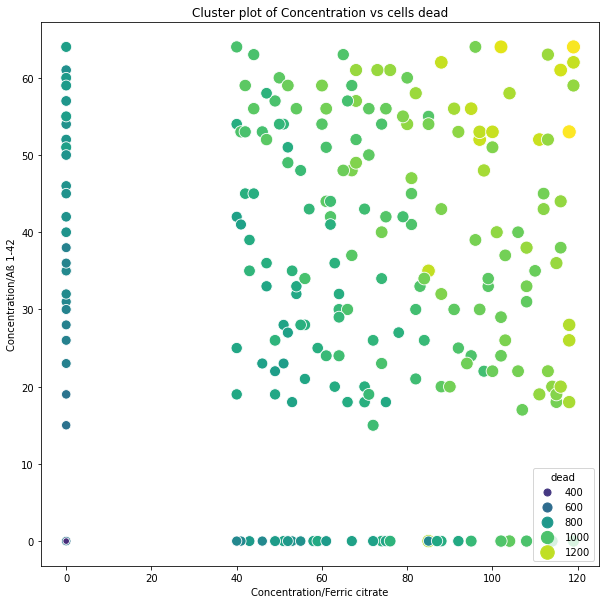

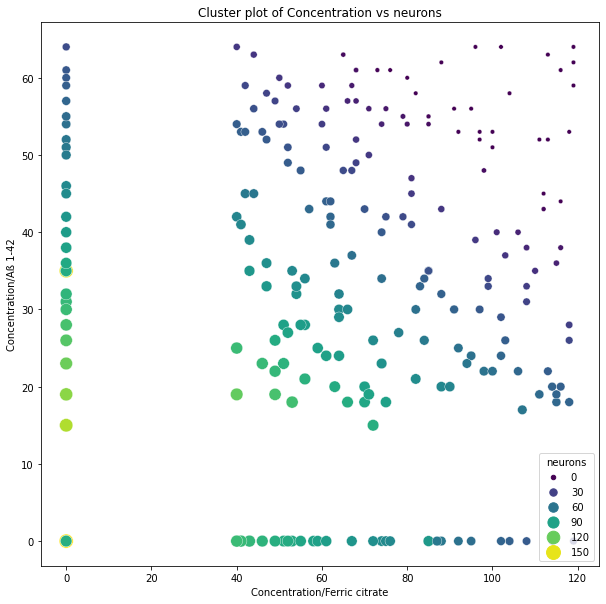

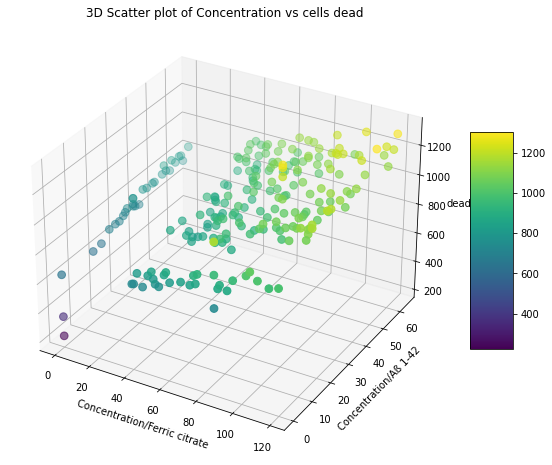

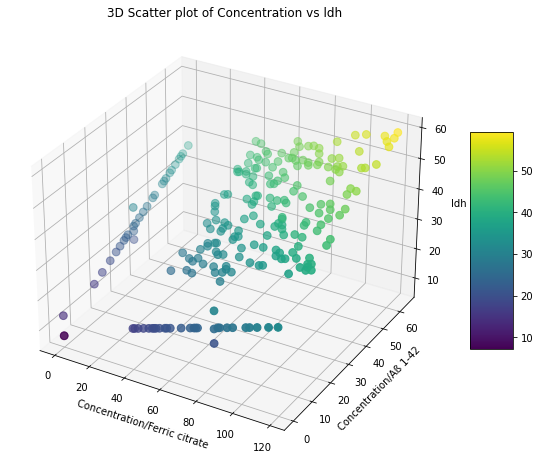

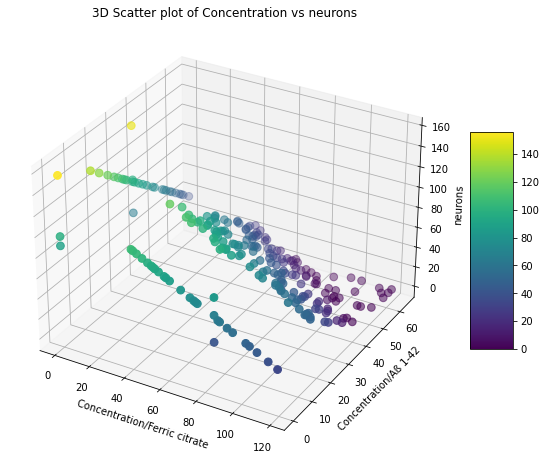

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sample data
data = {
    'Concentration/Ferric citrate': data_train['Concentration/Ferric citrate'],
    'Concentration/Aß 1-42': data_train['Concentration/Aß 1-42'],
    'dead': data_train['cells dead'],  
    'ldh' : data_train['%ldh'],
    'neurons': data_train['Neurons alive']
}

data_train_plot = pd.DataFrame(data)


# Scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_train_plot, x='Concentration/Ferric citrate', y='Concentration/Aß 1-42', hue='dead', size='dead', sizes=(20, 200), palette="viridis")

plt.title('Cluster plot of Concentration vs cells dead')
plt.show()

# Scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_train_plot, x='Concentration/Ferric citrate', y='Concentration/Aß 1-42', hue='neurons', size='neurons', sizes=(20, 200), palette="viridis")

plt.title('Cluster plot of Concentration vs neurons')
plt.show()

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(data_train_plot['Concentration/Ferric citrate'], 
                    data_train_plot['Concentration/Aß 1-42'], 
                    data_train_plot['dead'], 
                    c=data_train_plot['dead'], 
                    s=60, 
                    cmap='viridis')

# Title and labels
ax.set_title('3D Scatter plot of Concentration vs cells dead')
ax.set_xlabel('Concentration/Ferric citrate')
ax.set_ylabel('Concentration/Aß 1-42')
ax.set_zlabel('dead')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.show()

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(data_train_plot['Concentration/Ferric citrate'], 
                    data_train_plot['Concentration/Aß 1-42'], 
                    data_train_plot['ldh'], 
                    c=data_train_plot['ldh'], 
                    s=60, 
                    cmap='viridis')

# Title and labels
ax.set_title('3D Scatter plot of Concentration vs ldh')
ax.set_xlabel('Concentration/Ferric citrate')
ax.set_ylabel('Concentration/Aß 1-42')
ax.set_zlabel('ldh')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.show()

# Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(data_train_plot['Concentration/Ferric citrate'], 
                    data_train_plot['Concentration/Aß 1-42'], 
                    data_train_plot['neurons'], 
                    c=data_train_plot['neurons'], 
                    s=60, 
                    cmap='viridis')

# Title and labels
ax.set_title('3D Scatter plot of Concentration vs neurons')
ax.set_xlabel('Concentration/Ferric citrate')
ax.set_ylabel('Concentration/Aß 1-42')
ax.set_zlabel('neurons')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

plt.show()

## Visualization Summary:

In this analysis, the relationship between the number of dead cells (`cells dead`) and the number of living neurons (`Neurons alive`) is visualized for various treatment conditions.

### Data Preparation:

The `data_train` dataset was partitioned into four different treatment subsets:

1. **Control Group**: Where both `Concentration/Ferric citrate` and `Concentration/Aß 1-42` are zero.
2. **Ferric Citrate Treatment**: Only `Concentration/Ferric citrate` is non-zero.
3. **Aß Treatment**: Only `Concentration/Aß 1-42` is non-zero.
4. **Combined Treatment**: Both `Concentration/Ferric citrate` and `Concentration/Aß 1-42` are non-zero.

### Scatter Plots:

For each treatment condition, a scatter plot was created:
- Control Group is represented in green.
- Ferric Citrate Treatment is in blue.
- Aß Treatment is in dark pink (`#D21461`).
- Combined Treatment is in brick red (`#B6321C`).

Linear regression lines (trendlines) have also been plotted for each treatment condition except the control group, to show the trend in the relationship between the number of dead cells and living neurons.

### Axes and Title:

- X-Axis (Font: Arial, Bold, Size: 12): **Number of dead cells**
- Y-Axis (Font: Arial, Bold, Size: 12): **Number of neurons**
- Title (Font: Arial, Bold, Size: 12): **Number of neurons vs Number of dead cells**

### Legend:
Legend entries represent the four treatment conditions, with entries for regression lines labeled as '_no_legend_' to avoid duplication.

The resulting visualization helps in understanding how different treatments might affect cell viability and neuron survival.


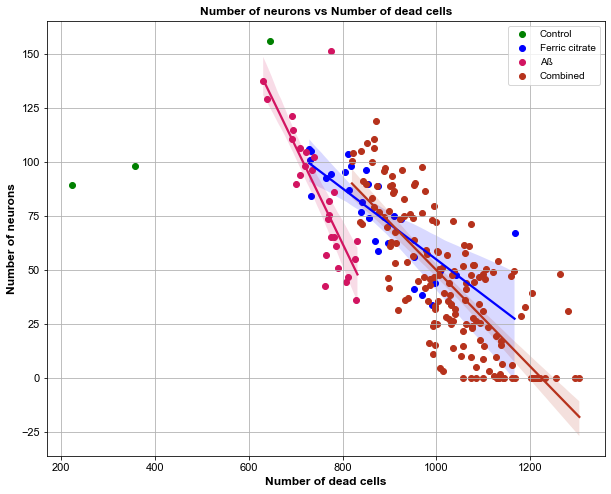

In [34]:
data_train_control = data_train[(data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] == 0)]
data_train_fe = data_train[(data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] == 0)]
data_train_aß = data_train[(data_train['Concentration/Ferric citrate'] == 0) & (data_train['Concentration/Aß 1-42'] != 0)]
data_train_both = data_train[(data_train['Concentration/Ferric citrate'] != 0) & (data_train['Concentration/Aß 1-42'] != 0)]



plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 8))
plt.scatter(data_train_control['cells dead'], data_train_control['Neurons alive'], color='green')
plt.scatter(data_train_fe['cells dead'], data_train_fe['Neurons alive'], color='blue')
sns.regplot(x=data_train_fe['cells dead'], y=data_train_fe['Neurons alive'], color='blue', label=None, scatter=False)
plt.scatter(data_train_aß['cells dead'], data_train_aß['Neurons alive'], color='#D21461')
sns.regplot(x=data_train_aß['cells dead'], y=data_train_aß['Neurons alive'], color='#D21461', label=None, scatter=False)
plt.scatter(data_train_both['cells dead'], data_train_both['Neurons alive'], color='#B6321C')
sns.regplot(x=data_train_both['cells dead'], y=data_train_both['Neurons alive'], color='#B6321C', label=None, scatter=False)

#plt.text(x=min(data_train_fe['cells dead']), y=max(data_train_fe['Neurons alive']), s=f"r_fe = {r_fe:.2f}")
#plt.text(x=min(data_train_aß['cells dead']), y=max(data_train_aß['Neurons alive']), s=f"r_aß = {r_aß:.2f}")
#plt.text(x=min(data_train_both['cells dead']), y=max(data_train_both['Neurons alive']), s=f"r_both = {r_both:.2f}")

# Adjust x and y axis labels font
plt.xlabel('Number of dead cells', fontsize=12, fontweight='bold')
plt.ylabel('Number of neurons', fontsize=12, fontweight='bold')


plt.title('Number of neurons vs Number of dead cells', fontsize=12, fontweight='bold')

# Adjust tick labels font
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(True)
plt.legend(['Control', 'Ferric citrate' ,'_no_legend_', '_no_legend_', 'Aß', '_no_legend_', '_no_legend_', 'Combined'])
plt.show()


## Visualization Summary:

In this visualization, we're exploring the relationship between the concentration of two treatments (`Ferric citrate` and `Aß 1-42`) and the number of living neurons (`Neurons alive`).

### Data Preparation:

The `data_train` dataset provides observations on the number of living neurons for varying concentrations of `Ferric citrate` and `Aß 1-42`.

### Scatter Plots:

Two scatter plots are overlaid:

1. **Ferric Citrate vs. Neurons Alive**:
   - Data Points are represented in blue.
   - A Gaussian Kernel Density Estimate (KDE) is shaded in varying shades of blue based on density.

2. **Aß 1-42 vs. Neurons Alive**:
   - Data Points are represented in red.
   - A Gaussian KDE is shaded in varying shades of red based on density.

### Gaussian Kernel Density Estimate (KDE):

KDE is a non-parametric way to estimate the probability density function of a random variable. In this context, it provides an understanding of the distribution of data. The Gaussian KDE used here can be represented by the following formula:

$$ KDE(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right) $$

Where:
- $( K )$ is the kernel (in this case, a Gaussian function),
$$ K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}} $$
- $( h )$ is the bandwidth,
- $( x_i )$ are the data points,
- $( n )$ is the number of data points.

### Axes and Title:

- **X-Axis** (Font: Arial, Bold, Size: 12): `Concentration (µm)`
- **Y-Axis** (Font: Arial, Bold, Size: 12): `Number of neurons`
- **Title** (Font: Arial, Bold, Size: 12): `Distribution of Number of neurons alive vs Concentration with Gaussian KDE`

This visualization is insightful as it shows how the number of living neurons varies with different concentrations of the treatments and provides a density representation to understand the concentration of data points in specific regions.


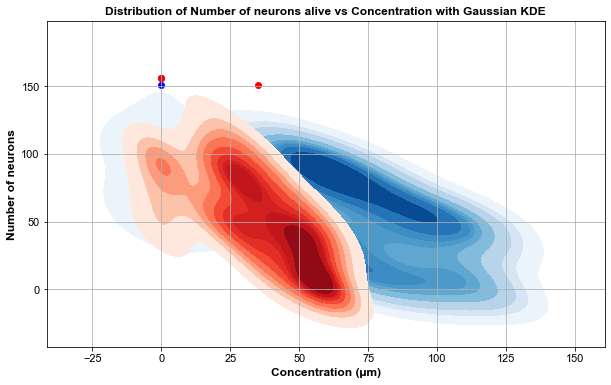

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Arial'

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data_train['Concentration/Ferric citrate'], data_train['Neurons alive'], color='blue', label='Data Points (fe)')

# Gaussian curve fitting
sns.kdeplot(data_train['Concentration/Ferric citrate'], data_train['Neurons alive'], cmap="Blues", shade=True, shade_lowest=False, label='Gaussian KDE (fe)')

plt.scatter(data_train['Concentration/Aß 1-42'], data_train['Neurons alive'], color='red', label='Data Points (Aβ)')
sns.kdeplot(data_train['Concentration/Aß 1-42'], data_train['Neurons alive'], cmap="Reds", shade=True, shade_lowest=False, label='Gaussian KDE (Aβ)')

plt.title('Distribution of Number of neurons alive vs Concentration with Gaussian KDE', fontsize=12, fontweight='bold')
plt.xlabel('Concentration (µm)', fontsize=12, fontweight='bold')
plt.ylabel('Number of neurons', fontsize=12, fontweight='bold')
# Adjust tick labels font
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

#plt.legend()
plt.grid(True)
plt.show()


## Visualization Summary:

### Ferric citrate vs. Number of Dead Cells:

1. In the first plot, the scatter points represent the relationship between the concentration of Ferric citrate and the count of dead cells. The Gaussian KDE (Kernel Density Estimation) overlays these data points to visualize the probability density of the data at different values.
2. From the visualization, we can discern patterns in how the concentration of Ferric citrate might affect the number of dead cells.

### Aβ (Amyloid-beta) vs. Number of Dead Cells:

1. The second plot follows a similar format but focuses on the concentration of Aβ. Again, the scatter points depict the actual data, while the Gaussian KDE gives us a clearer view of the data distribution.
2. The distribution helps in understanding how varying concentrations of Aβ might influence the cell death count.



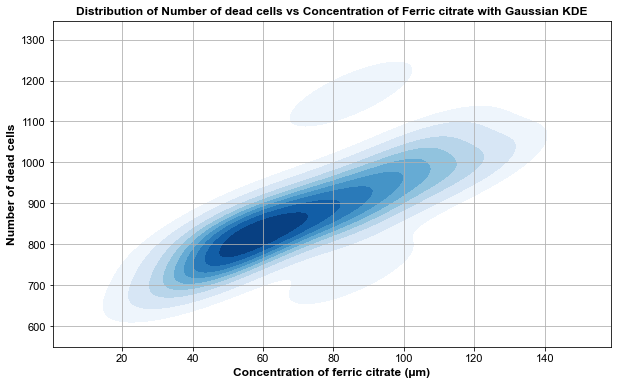

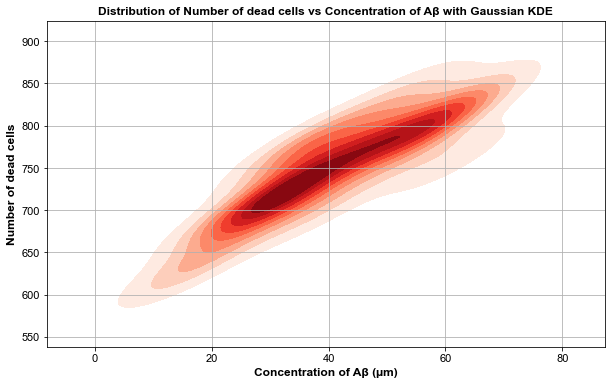

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Arial'


# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data_train_fe['Concentration/Ferric citrate'], data_train_fe['cells dead'], color='blue', label='Data Points (fe)')

# Gaussian curve fitting
sns.kdeplot(data_train_fe['Concentration/Ferric citrate'], data_train_fe['cells dead'], cmap="Blues", shade=True, shade_lowest=False, thresh=0.05, label='Gaussian KDE (fe)')


plt.title('Distribution of Number of dead cells vs Concentration of Ferric citrate with Gaussian KDE', fontsize=12, fontweight='bold')
plt.xlabel('Concentration of ferric citrate (µm)', fontsize=12, fontweight='bold')
plt.ylabel('Number of dead cells', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.legend()
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data_train_aß['Concentration/Aß 1-42'], data_train_aß['cells dead'], color='red', label='Data Points (Aß)')

# Gaussian curve fitting
sns.kdeplot(data_train_aß['Concentration/Aß 1-42'], data_train_aß['cells dead'], cmap="Reds", shade=True, shade_lowest=False, thresh=0.05, label='Gaussian KDE (Aß)')

plt.title('Distribution of Number of dead cells vs Concentration of Aβ with Gaussian KDE', fontsize=12, fontweight='bold')
plt.xlabel('Concentration of Aβ (µm)', fontsize=12, fontweight='bold')
plt.ylabel('Number of dead cells', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.legend()
plt.grid(True)
plt.show()

In [44]:
from scipy.stats import pearsonr

r_fe = np.corrcoef(data_train_fe['cells dead'], data_train_fe['Neurons alive'])[0, 1]
r_aß = np.corrcoef(data_train_aß['cells dead'], data_train_aß['Neurons alive'])[0, 1]
r_both = np.corrcoef(data_train_both['cells dead'], data_train_both['Neurons alive'])[0, 1]

r_f, p_f = pearsonr(data_train_fe['cells dead'], data_train_fe['Neurons alive'])
r_a, p_a = pearsonr(data_train_aß['cells dead'], data_train_aß['Neurons alive'])
r_b, p_b = pearsonr(data_train_both['cells dead'], data_train_both['Neurons alive'])

print('r value of fe treatment:', r_fe)
print('r value of Aß treatment:', r_aß)
print('r value of combined treatment:', r_both)

r_squared_fe = r_fe**2
r_squared_aß = r_aß**2
r_squared_both = r_both**2

print('r² value of fe treatment:', r_squared_fe)
print('r² value of Aß treatment:', r_squared_aß)
print('r² value of combined treatment:', r_squared_both)

print('p value of fe treatment:', p_f)
print('p value of Aß treatment:', p_a)
print('p value of combined treatment:', p_b)

r value of fe treatment: -0.782341850715699
r value of Aß treatment: -0.7807911154788438
r value of combined treatment: -0.7677099099354362
r² value of fe treatment: 0.612058771381265
r² value of Aß treatment: 0.6096347660106972
r² value of combined treatment: 0.5893785058130756
p value of fe treatment: 5.347221408840672e-07
p value of Aß treatment: 9.493229666436251e-07
p value of combined treatment: 4.22028908596611e-34


## Summary

In this analysis, we explored the relationship between the concentrations of Ferric citrate and Aβ (Amyloid-beta) and their impact on the number of neurons and dead cells. We performed various data preprocessing steps, including handling missing values and categorizing samples based on their treatment conditions. We also calculated Pearson correlation coefficients to understand the linear relationships between different variables.

Next, we trained a Linear Regression model to predict LDH (Lactate Dehydrogenase) levels based on the concentrations of Ferric citrate and Aβ. We used this model to generate predictions for LDH levels across a range of concentration combinations.

Additionally, we used another Linear Regression model to predict the number of neurons based on treatment conditions, LDH levels, and the number of dead cells. We combined these predictions with the original data to update and refine our dataset.

We visualized our data using scatter plots and Gaussian Kernel Density Estimations (KDEs) to gain insights into the distribution of dead cells concerning the concentrations of Ferric citrate and Aβ.

## Conclusion

- The concentrations of Ferric citrate and Aβ have an impact on LDH levels, which suggests their potential involvement in cellular processes.
- By generating predictions for LDH levels and combining them with the original data, we improved the dataset's completeness.
- Visualization of the data revealed patterns in the distribution of dead cells concerning Ferric citrate and Aβ concentrations.

This analysis provides valuable insights into the relationship between chemical concentrations and cellular outcomes, which may be crucial for further investigations and experiments in the field of cellular biology and neurodegenerative diseases.
